In [76]:
# Import numerical resources
import numpy as np
import random as rn

# Import graphics resources
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook

In [77]:
x = np.linspace(0,1.0,9); print x
dx = x[1]-x[0]; print dx

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]
0.125


In [78]:
D = 1.0

In [79]:
dt = dx**2/2/D / 10; print dt
nt = 20 # Number of time steps
t = dt*nt; print t

0.00078125
0.015625


In [80]:
C = (dt * D) / (dx**2); print C # For constants in "propagate" function 

0.05


In [81]:
# Starting f(t,x) as 2-D array of random numbers; pseudo: f[time][x]; n = 0 row stores initial field

f = np.array([[rn.random() for i in range(len(x))] for j in range(int(t/dt)+1)]); print f; # Adding a time row to include intial field

[[ 0.6205398   0.98436535  0.00614919  0.35610994  0.31956695  0.70393658
   0.15320685  0.65988454  0.06590944]
 [ 0.70626684  0.50174871  0.49715711  0.48962937  0.08398729  0.83926473
   0.75652513  0.57609576  0.43278832]
 [ 0.24783765  0.27427443  0.30858206  0.75205861  0.40776298  0.33632741
   0.98762192  0.28016305  0.91170418]
 [ 0.78744333  0.01381178  0.57107742  0.28299091  0.35940045  0.60391605
   0.96780581  0.80763163  0.47346115]
 [ 0.44735883  0.73592018  0.53479786  0.21888623  0.16341817  0.25567057
   0.22349644  0.86180607  0.49575162]
 [ 0.36126879  0.55147947  0.86776018  0.86100795  0.09774898  0.80825842
   0.80364403  0.4487154   0.0942612 ]
 [ 0.6771417   0.96664666  0.84114487  0.60697242  0.66828245  0.52797181
   0.68366434  0.28266266  0.99786745]
 [ 0.40989948  0.67558428  0.84961237  0.29296405  0.78084427  0.8134216
   0.19099795  0.15761306  0.50806361]
 [ 0.29271909  0.75800279  0.66681505  0.53761642  0.27888712  0.50987488
   0.5547243   0.454694

In [82]:
# Function that iterates diffusion values through number of time steps
def propagate(f, nt, dt):
    # nt = len(f) - 1 # not including initial field in number of time steps
    # print nt
    t_tot = [0.0]
    t = 0.0
    for n in range(0, nt) :
        t += dt
        t_tot.append(t)
        for k in range(0, len(x)):
            f_pre = f[n][k] 
            if k == 0:
                f[n+1][k] = C * ( f[n][len(x)-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hi'

            elif k == (len(x) - 1):
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][0] ) + f_pre
                # print'hello'
            else:
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hey'
                
    return f, t_tot

In [83]:
f, t_tot = propagate(f,nt,dt)
xgrid, tgrid = np.meshgrid(x,t_tot)

%whos

Variable    Type             Data/Info
--------------------------------------
Axes3D      type             <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
C           float64          0.05
D           float            1.0
ax          Axes3DSubplot    Axes(0.125,0.1;0.775x0.8)
dt          float64          0.00078125
dx          float64          0.125
f           ndarray          21x9: 189 elems, type `float64`, 1512 bytes
fig         Figure           Figure(640x480)
i           int              8
j           int              20
np          module           <module 'numpy' from '//a<...>ages/numpy/__init__.pyc'>
nt          int              20
plt         module           <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
propagate   function         <function propagate at 0x120310aa0>
rn          module           <module 'random' from '//<...>ib/python2.7/random.pyc'>
t           float64          0.015625
t_tot       list             n=21
tgrid       ndarray          21x9: 189 elems, 

<IPython.core.display.Javascript object>


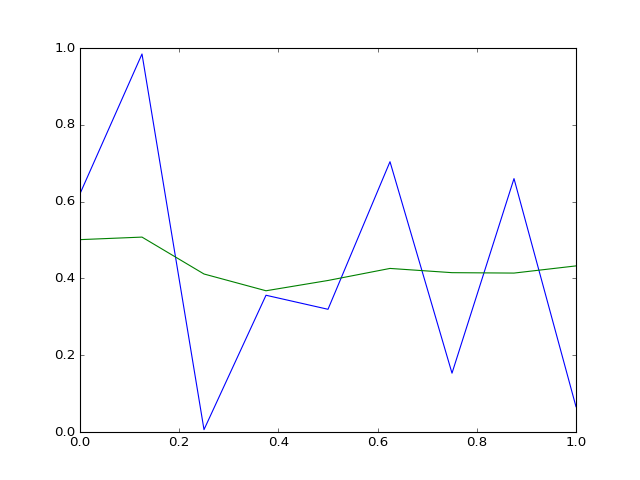

In [84]:
# This graphs first and last
plt.figure()
plt.plot(x,f[0])
plt.plot(x,f[-1])

<IPython.core.display.Javascript object>


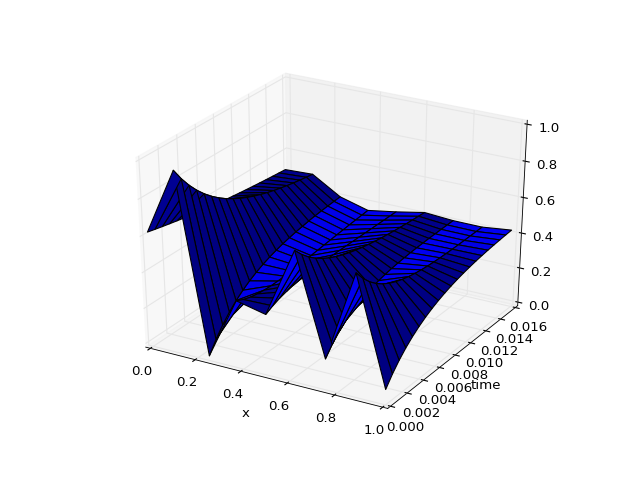

In [85]:
# This plots the solution as a function of time and space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, tgrid, f, rstride=1,cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('time')